# 합성곱 신경망 CNN

## Affine 계층 vs. CNN

#### Affine 계층
- 계층(레이어)간 노드들이 완전 연결되어 있는 신경망 계층

<img src="picture/affine계층.png" />

- CNN

<img src="picture/CNN_flow.png" />


### 완전연결 계층의 문제점
- 데이터의 형상이 무시된다. fully connected 에서는 1차원이어서 그림을 인식하기에 부적합하다..


- 입력 데이터가 이미지라면
    - 세로
    - 가로
    - 채녈(색상)
    - 공간적 정보: 완전연결 계층에서는 공간적 정보를 무시하고 모든 입력 데이터를 동등한 뉴런으로 취급
    


### 합성곱 연산(convolution)
- 이미지 처리에서의 필터 연산과 같은 작업

<img src="picture/convolution.png" />


- 필터의 윈도우(window)를 일정 간격으로 이동해가며 입력 데이터에 적용
- 단일 곱셈-누산(fused multiply-add, FMA), 같은위치 곱 후 SUM
- 행렬의 내적 곱을 사용하기도 한다.


- 특정 맵(feature map)
    - CNN에서의 입출력 데이터
    
    
- weight 가 따로 없고, 필터가 weight의 역할을 하게 된다!! 


- 이미지 processing중 화사하게, 선명하게등의 기능을 위의 필터를 통해서 적용하는 것이다!! 


- 합성곱 연산의 계산 순서 알지!! 


### 합성곱 연산
- http://cs231n.github.io/convolutional-networks/

- 바이어스 고려
<img src="picture/convolution_with_bias.png" />

### 학습
- 필터의 매개변수가 다른 신경망의 가중치에 해당
<img src="picture/학습.png" />

- 학습 후 값을 통해서 세로선, 가로선, 블럭 들을 찾게 해준다. 
- CNN은 필터가 학습이 되는거다!!

### 패딩(padding)
- convolution(합성곱 연산)을 수행하기 전에 입력 데이터 주변을 특정 값으로 채우는 작업

- 폭 1짜리 패딩
<img src="picture/padding.png" />

### 패딩 사용 목적
- 출력 크기 조정

- (4,4) 입력 데이터에 (3,3) 필터 적용
    - (2,2) 출력
    - convolution을 여러 번 적용 -> 출력 크기가 1 -> convolution 적용 불가
    
- (4,4) 입력 데이터에 패딩 폭1 -> (6,6) 입력 데이터
    - (3,3) 필터 적용 -> (4,4) 출력 데이터
    
- 패딩을 통해서 convolution이 여러변 가능하도록!! 

### 스트라이드(stride)
- 필터 적용하는 위치 간격
- 스트라이드가 2인 경우
<img src="picture/stride.png" />


### 스트라이드, 패딩과 출력의 관계
- 스트라이드↑, 출력↓
- 패딩↑, 출력↓

$OH = \frac{H+2P-FH}{S} +1 $ - 높이   
$OW = \frac{W+2P-FW}{S} +1 $ - 폭    

- 입력: (4,4), 패딩:1, 스트라이드:1, 필터:(3,3)
    - 출력은?
- 입력:(7,7), 패딩:0, 스트라이드:2, 필터:(3,3)
- 입력:(28,31), 패딩:2, 스트라이드:3, 필터:(5,5)

### 3차원 데이터의 합성곱 연산
- 채널까지 고려한 이미지 데이터: 3차원 데이터
- 필터도 3차원: 입력데이터의 채널 수와 필터의 채널 수가 일치해야 함
- **출력 데이터는 2차원**
<img src="picture/3convolution.png" />

---

<img src="picture/3convolution_cal.png" />

### 블록으로 생각하기
- 데이터와 필터를 직육면체 블록으로 간주
- (채널, 높이, 너비) 순서로 표기
    - (C, H, W)
    - (C, FH, FW)
    
  
<img src="picture/3convolution3.png" />

### 픽터의 개수 -> 출력 특징 맵 개수
- 필터의 가중치 데이터 : 4차원 데이터
    - (20, 3, 5, 5)
    
### 여러 필터를 사용한 합성곱 연산

<img src="picture/3convolution_cal2.png" />

- 필터 FN개로 출력 FN개 뽑음!
- 필터가 4차원 이라고 하네!! (FH C FW FN) 으로
- 필터의 값을 변경하는 것이 학습하는 거다!!

### 바이어스가 추가된 합성곱 연산의 처리 흐름
- 채널 당 바이어스 하나 할당
<img src="picture/convolution_with_bias3.png" />

### 배치 처리
- 각 신경망 계층을 흐르는 데이터 : 4차원
    - (데이터 수, 채널 수, 높이, 너비)
- N 데이터
<img src="picture/convolution_batch.png" />

### 풀링 계층(pooling layer)
- 풀링
    - 세로 및 가로 방향의 공간을 줄이는 연산
    - 최대(max) 풀링, 평균(average) 풀링 / 최대풀링을 더 많이 씀, 연산이 적어서


- 최대 풀링(max pooling)을 스트라이드 2로 처리하는 예

<img src="picture/pooling.png" />


- ReLU 후에 Pooling을 하네, 선택적이지. 
- 한 공간에 빨간색만 많이 있다 치면 그것을 다 연산하는 것보다 Pooling 해서 연산하는 것이 좋지!! 


### 풀링 계층의 특징
1. 학습해야 할 매개변수가 없다.
    - 최댓값 혹은 평균을 취하는 명확한 처리하므로
    
2. 채널 수가 변하지 않는다.
    - 채널마다 독립적으로 계산하므로

<img src="picture/pooling_feature.png" />


3. 입력의 변화에 강건하다(영향을 적게 받는다) - Robust 하다!
    - 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않는다.
    
<img src="picture/pooling_feature2.png" />

### convolution 계층 및 풀링 계층 구현하기
- 4차원 배열

### Im2col 함수
- 4차원 배열의 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는 함수
- batch data

<img src="picture/im2col.png" />

- 1차원으로 펼쳐버리네...

- 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 전개
<img src="picture/im2col2.png" />

- 필터를 적용하기 전 준비하는 단계이다!! 

### 컨벌루션 연산의 필터 처리 상세과정
- 필터를 세로로 1열로 전개
- Im2col이 전개한 데이터와 1열로 전개한 필터를 행렬 내적 연산
- 출력 데이터를 변형(reshape)

<img src="picture/im2col_detail3.png" />

- 중첩 for loop를 쓰지 않기 위해서 차원을 늘려서 행렬연산으로 해결!! 

### 합성곱 계층 구현하기
- im2col 함수의 인터페이스
    - common/util.py

### im2col 함수 사용예

In [3]:
import sys, os
sys.path.append(os.pardir)
from origin.common.util import im2col

In [5]:
import numpy as np

In [8]:
x1 = np.random.rand(1,3,7,7) # (데이터수, 채널 수, 높이, 너비)

In [9]:
col1 = im2col(x1, 5, 5, stride=1, pad=0)

In [10]:
print(x1.shape)
print(col1.shape)

(1, 3, 7, 7)
(9, 75)


- 1표모음 3표 7행 7열
- 9행 75열
<img src="picture/im2col_practice.jpg" />
<img src="picture/im2col_practice2.jpg" />

In [12]:
print(x1[:, :, :5,:5])

[[[[ 0.87777875  0.67228848  0.23722382  0.27481371  0.33299883]
   [ 0.27802886  0.18626135  0.45132356  0.05330373  0.78401352]
   [ 0.15036712  0.07681448  0.35860239  0.37308431  0.02348845]
   [ 0.79654802  0.06232607  0.1584338   0.42041003  0.56258361]
   [ 0.42921962  0.79963761  0.81248993  0.78268385  0.48903496]]

  [[ 0.56272886  0.3149854   0.83369376  0.16627463  0.02169535]
   [ 0.76339882  0.29131283  0.6204335   0.95618729  0.30715597]
   [ 0.45541981  0.65162417  0.36126868  0.59990628  0.46762084]
   [ 0.35459288  0.48994009  0.07943951  0.68304741  0.19321725]
   [ 0.67105399  0.92022149  0.73072464  0.84869123  0.75404707]]

  [[ 0.71456275  0.3861099   0.48589993  0.48680978  0.76877192]
   [ 0.04174912  0.82381177  0.21777485  0.89279246  0.2282715 ]
   [ 0.05728496  0.83489447  0.53928142  0.54618851  0.34796117]
   [ 0.05403371  0.82149839  0.42127543  0.7453959   0.09043367]
   [ 0.76912582  0.04997285  0.17932384  0.1689475   0.77111354]]]]


↑ 필터가 처음으로 적용될 (3,5,5) = (채널,행,열) 을 뽑아 낸거다!! 

In [18]:
np.shape(col1[0, :])
col1[0, :]

array([ 0.87777875,  0.67228848,  0.23722382,  0.27481371,  0.33299883,
        0.27802886,  0.18626135,  0.45132356,  0.05330373,  0.78401352,
        0.15036712,  0.07681448,  0.35860239,  0.37308431,  0.02348845,
        0.79654802,  0.06232607,  0.1584338 ,  0.42041003,  0.56258361,
        0.42921962,  0.79963761,  0.81248993,  0.78268385,  0.48903496,
        0.56272886,  0.3149854 ,  0.83369376,  0.16627463,  0.02169535,
        0.76339882,  0.29131283,  0.6204335 ,  0.95618729,  0.30715597,
        0.45541981,  0.65162417,  0.36126868,  0.59990628,  0.46762084,
        0.35459288,  0.48994009,  0.07943951,  0.68304741,  0.19321725,
        0.67105399,  0.92022149,  0.73072464,  0.84869123,  0.75404707,
        0.71456275,  0.3861099 ,  0.48589993,  0.48680978,  0.76877192,
        0.04174912,  0.82381177,  0.21777485,  0.89279246,  0.2282715 ,
        0.05728496,  0.83489447,  0.53928142,  0.54618851,  0.34796117,
        0.05403371,  0.82149839,  0.42127543,  0.7453959 ,  0.09

- convolution code 봄 in common/layers.py

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 중간 데이터（backward 시 사용）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 가중치와 편향 매개변수의 기울기
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

- 참고, numpy의 reshape

In [27]:
x = np.array(np.arange(48)); x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [28]:
x.reshape((4,-1)) # row 4개 나머지는 알아서!! 

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [29]:
x.reshape((2,-1, -1)) # 이 경우는 불가능 하지!! -1은 1번만 써야한다!! 

ValueError: can only specify one unknown dimension

In [30]:
x.reshape((2,-1, 8))

array([[[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47]]])

In [31]:
x.reshape((-1,3,2,4))

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]],


       [[[24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39]],

        [[40, 41, 42, 43],
         [44, 45, 46, 47]]]])

In [34]:
f = np.array(np.arange(27)).reshape(1,3,3,3)

In [35]:
f

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]]])

In [36]:
f.reshape(1,-1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [37]:
f.reshape(1,-1).T

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26]])

- 3x3x3 짜리 필터를 2개

In [39]:
f = np.array(np.arange(54)).reshape(2,3,3,3)

In [40]:
f.reshape(2,-1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53]])

In [41]:
f.reshape(2,-1).T

array([[ 0, 27],
       [ 1, 28],
       [ 2, 29],
       [ 3, 30],
       [ 4, 31],
       [ 5, 32],
       [ 6, 33],
       [ 7, 34],
       [ 8, 35],
       [ 9, 36],
       [10, 37],
       [11, 38],
       [12, 39],
       [13, 40],
       [14, 41],
       [15, 42],
       [16, 43],
       [17, 44],
       [18, 45],
       [19, 46],
       [20, 47],
       [21, 48],
       [22, 49],
       [23, 50],
       [24, 51],
       [25, 52],
       [26, 53]])

---

In [49]:
x = np.array(np.arange(108)).reshape(-1,27)
f2 = f.reshape(2,-1)
print(x.shape)
print(f2.T.shape)

(4, 27)
(27, 2)


In [51]:
out = np.dot(x,f2.T)
out

array([[  6201,  15678],
       [ 15678,  44838],
       [ 25155,  73998],
       [ 34632, 103158]])

- ↑위 결과는 입력 1개에 필터 2개를 적용한 결과. 
- 1번 column은 x에 대해서 1번 필터를 convolution한 결과! 


- 위 결과를 다시 입력을 다시 reshape 해야 한다. 2차원으로 filter 개수가 2개 이기 때문에!! 
    - 행 4가 OH, OW 로 나뉘어야 하고, 열2가 FH가 되어야 한다. 
    - (4,2) -> (2,2,2) 로 바꾸야 한다!! 
    
- 지금까지 convolution 코드 분할해서 본거다!! 

In [54]:
out.reshape(1,2,2,-1)

array([[[[  6201,  15678],
         [ 15678,  44838]],

        [[ 25155,  73998],
         [ 34632, 103158]]]])

In [53]:
out.reshape(1,2,2,-1).transpose(0,3,1,2) #

array([[[[  6201,  15678],
         [ 25155,  34632]],

        [[ 15678,  44838],
         [ 73998, 103158]]]])

- ↑ 위와 같이 변형해 주었다. 
- transpose(0,3,1,2) 는 "표모음=>표모음"으로 "표=>열"로 "행=>표"로 "열=>행"으로.!!

### 합성곱 계층 구현하기
- common/layers.py
- Convolution 클래스
    - forward() 매소드
        - im2col 함수 이용하여 입력 데이터 전개
        - 필터 전개
        - 전개한 입력 데이터와 필터의 행렬 내적 연산
        - 출력 데이터의 형상을 재구성하고 축의 순서 변경
        
        
<img src="picture/transpose.png"/>

-  Number, Channel, Height, Width

- ### CNN에도 당연히 역전파가 있다!! 
    - 계산 그래프 그리며 하면 도움이 된다.
    - col2im 있다. 역으로 가야하니!! 

### 합성곱 계층 구현하기
- common/layers.py
- Convolution 클래스
    - backward() 메소드: 역전파
        - Affine 계츠의 구현과 많이 유사
        - im2col을 역으로 처리해야 함
        - col2im 함수: common/util.py

In [56]:
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

### Pooling
- 역전파 부분 그냥 반대로 해주면 되지!! 

### 풀링 계층 구현하기
- im2col 함수를 사용해 입력 데이터 전개
- 채널이 독립인 점이 합성공 계층과 다른 점

<img src="picture/im2col_pooling.png" />

### 풀링 계층 구현하기
- 풀링 계층 구현의 흐름: 최대 풀링(가장 큰 원소는 회색으로 표시)
    - 입력 데이터 전개
    - 행별 최댓값
    - 적절한 모향으로 성형
    
    
<img src="picture/complete_pooling.png" />

- common/layers.py
- Pooling 클래스
    - forward() 메소드
        - 입력 데이터 전개
        - 행별 최댓값
        - 적절한 모영으로 성형
    - backward() 메소드
        - ReLU 노드 구현 시 사용한 max의 역전파 참고

In [57]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

### CNN 구현하기
- 손글씨 숫자를 인식하는 CNN
<img src="picture/cnn.png" />
- ch07/Simple_convnet.py

- ReLU를 왜 사용하나?! 
    - => 활성화 함수라는 것을 인지하고 있으면 된다. Weight가 0이 되는 경우는 매우 드물다. 그래서 어떤 경우에도 다음 노드에 영향을 미치고 있는 것이다. 그런데 이런 것을 방지하기 위해서, 신호를 보내지 않는 것을 표현하기 위해서 ReLU로 음수를 0으로 전환하는 것이다.
    - 이렇게 0을 만드는 것이 Sigmoid보다 ReLU가 효율적이다!
    - 0 으로 처리하면 속도도 빨라지고!!


In [ ]:

class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax [3층 신경망]
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1 # FH, FW
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        # 위는 filter다!! 4차원 배열을 랜덤하게 만듦. (30,28,5,5)
        
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        
        # 1은닉층
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        
        # 2은닉층
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        # 마지막 결과 출력까지!! 
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x) # 이 forward라는 method를 다 적용해 두었기 때문에 가능!! 

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

### CNN 시각화학
- CNN의 필터 시각화
    - ch07/visualize_filter,.py
    
<img src="picture/cnn_picture.png" />    

In [64]:
%cd origin/ch07

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin\ch07


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [66]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

In [67]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

In [68]:
max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        

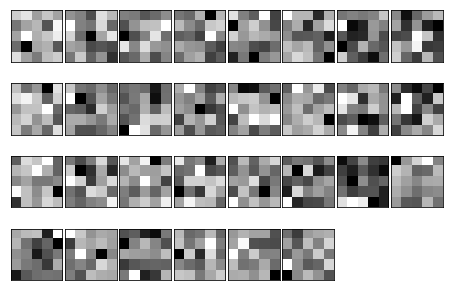

In [69]:
filter_show(network.params['W1']) 

- ↑ 30개

In [70]:
trainer = Trainer(network, x_train, t_train, x_test, t_test, # t=target 값 실제값
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.29961164386
=== epoch:1, train acc:0.217, test acc:0.22 ===
train loss:2.29699771561
train loss:2.29423688223
train loss:2.28717746
train loss:2.27999796438
train loss:2.26427105331
train loss:2.24851614417
train loss:2.24709106276
train loss:2.21659224761
train loss:2.18251402146
train loss:2.19536916656
train loss:2.12163988723
train loss:2.10630952411
train loss:2.06697068118
train loss:1.98800462153
train loss:1.92521156657
train loss:1.90635375739
train loss:1.8528273125
train loss:1.83642710989
train loss:1.69479488995
train loss:1.5845289591
train loss:1.45579951233
train loss:1.39028397727
train loss:1.27834514764
train loss:1.25953951636
train loss:1.31556508921
train loss:1.18876481897
train loss:1.06530012503
train loss:1.03656376664
train loss:0.916239698969
train loss:1.05711002997
train loss:0.911143631706
train loss:0.799395966614
train loss:0.716888138676
train loss:0.767050163644
train loss:0.698531492328
train loss:0.716448121211
train loss:0.631013905232

In [75]:
# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


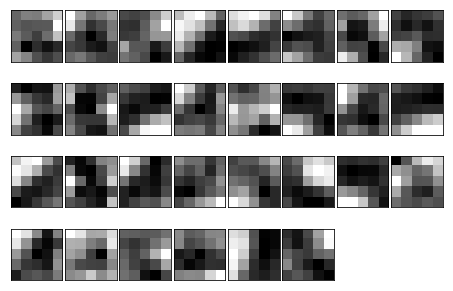

In [76]:
filter_show(network.params['W1']) 

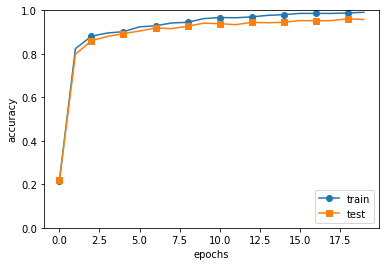

In [77]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### CNN 시각화 하기
- 학습 후의 필터에 담긴 정보는 무엇일까?
    - 에지: 색상이 바뀐 경계선
    - 블롭: 국소적으로 덩어리진 
    
<img src="picture/CNN_EDGE.png" />

### CNN 시각화하기
- 층 깊이에 따른 추출 정보 변화
    - 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출됨
    
- AlexNet이라는 8계층 CNN의 예

<img src="picture/AlexNet.png" />

### 정리
- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
- CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
- 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해 보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.

## RNN 참고자료 (TODO:: 동영상&자료 정리!! )
- 간단한 설명보면, 재귀적으로 표현되지 노드가! t는 time이다. t+1상태 h(결과)를 뽑을 때 이전 상태(t상태)의 것을 고려해서 결과값을 출력하겠다!! 
- RNN은 memory 기능이 있다! 
- CNN에서는 서로 독립적이지..
- short term => 현재 / long term => 과거 
- 이 RNN에 어디에 쓰이나.. **자연어처리**, 번역, 연관검색어
- t를 꼭 시간으로만 보는 것은 아니다. 이전글자 참고하기 ex) 글자자동완성부분, 다음글자 뭔지.. 
- state의 weight는 다 똑같다. 그래서 뒤로갈수록 0에 수렴해 버리지... 이것을 보완한 것이 LSTN이다!! 

---

[Reference] TODO::정리!!
  * 김 성훈 교수님 유투브 강의 ML lab12 시리즈
    - https://www.youtube.com/watch?v=B5GtZuUvujQ
  * 테리 엄태웅 유투브 강의
    - https://www.youtube.com/watch?v=SoNtAjxA3Jo
  * Colah's blog
    - http://colah.github.io/posts/2015-08-Understanding-LSTMs/
    - 번역: http://www.whydsp.org/280
  * Andrej Karpathy's blog
    - http://karpathy.github.io/2015/05/21/rnn-effectiveness/